In [1]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")  # path contains python_file.py
from plot_utils import plot_fi, get_results_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

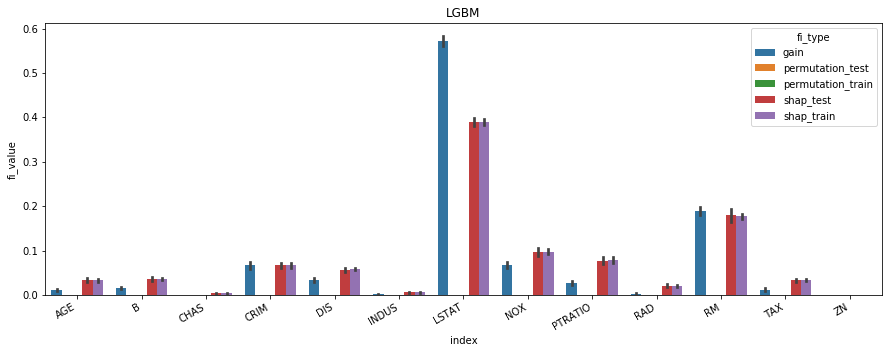

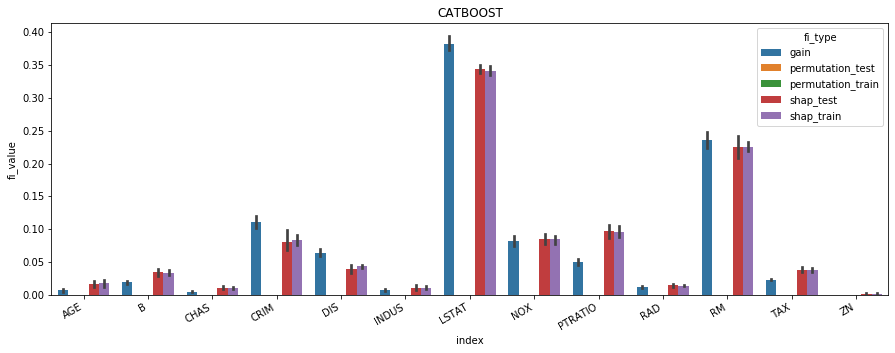

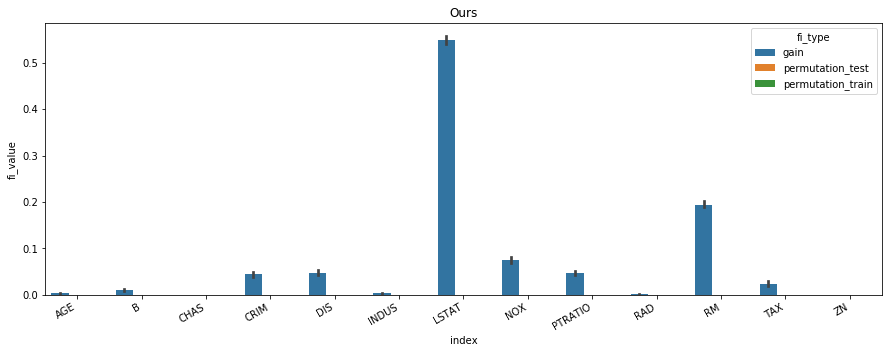

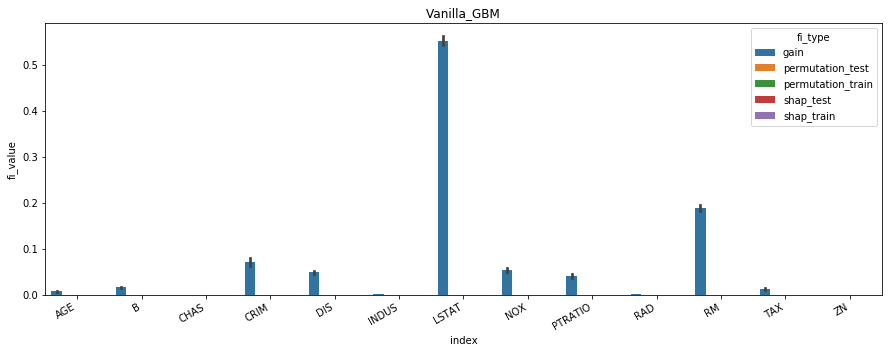

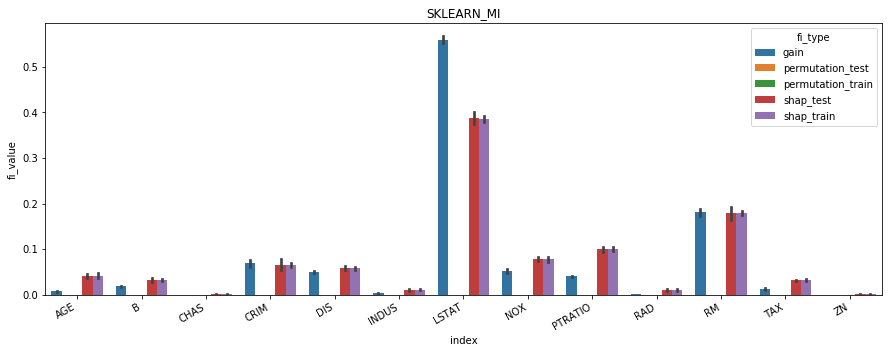

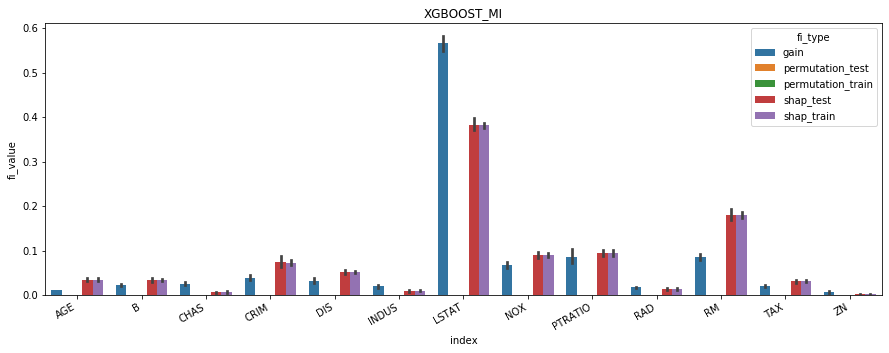

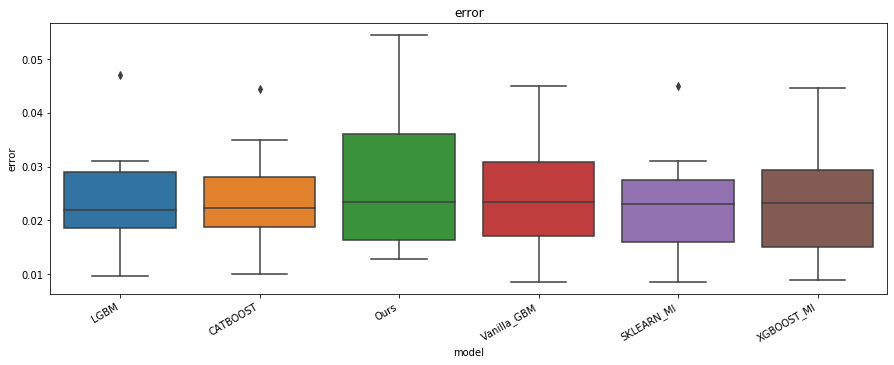

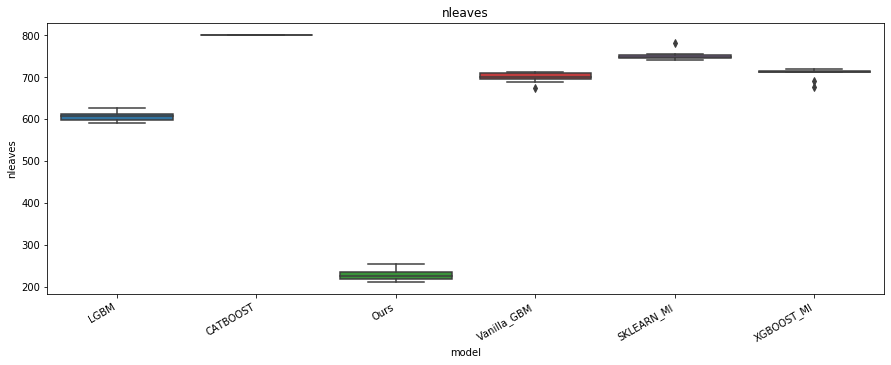

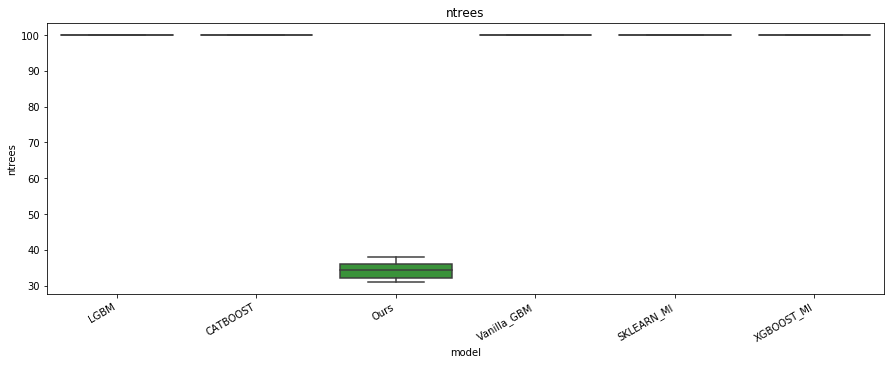

In [2]:
folder = "C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/experiments/gbm_regression/boston_house_pricing/boston_hp_Log"
plot_fi('BARPLOT', folder, False, True)

In [3]:
fi, metrics = get_results_data(folder, normalize=True, one_hot=False)
model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CatBoost', 'Ours' : 'CVB', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'SKLEARN Mean Imputing','XGBOOST_MI' : 'XGBOOST Mean Imputing'}
metrics['model'] = metrics['model'].map(model_map)

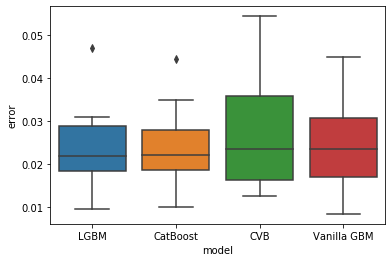

\begin{tabular}{lllll}
\toprule
model &              CVB &         CatBoost &             LGBM &      Vanilla GBM \\
\midrule
rmse &  0.0276 ± 0.0143 &  0.0241 ± 0.0102 &  0.0238 ± 0.0108 &  0.0243 ± 0.0115 \\
\bottomrule
\end{tabular}



In [4]:
models = ['Vanilla GBM', 'LGBM', 'CatBoost', 'CVB']
metrics = metrics[metrics.model.isin(models)]
sns.boxplot(x = 'model',y= 'error',data =metrics)
plt.show()

df = metrics.groupby('model')['error'].agg(['mean','std'])
df = df.round(4)
df['rmse'] = df['mean'].astype(str) + u" \u00B1 " + df['std'].astype(str)
print(df[['rmse']].T.to_latex())